In [342]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

In [408]:
def proj_motion(t, eqn):
    x, y, vx, vy = eqn
    g = 9.81 # m/s/s
    ax = 0
    ay = -g
    return [vx, vy, ax, ay]

In [409]:
v0 = 50 # m/s
phi = np.radians(45)

In [410]:
vx = v0 * np.cos(phi)
vy = v0 * np.sin(phi)

In [411]:
time = np.linspace(0, 10, 10000)
t_span = (0, 10)
initial_conditions = [0, 0, vx, vy]

In [412]:
solution = solve_ivp(proj_motion, t_span, initial_conditions, t_eval = time, method='RK45', dense_output=True)

In [413]:
x = solution.y[0]
y = solution.y[1]
vx = solution.y[2]
vy = solution.y[3]
time = solution.t

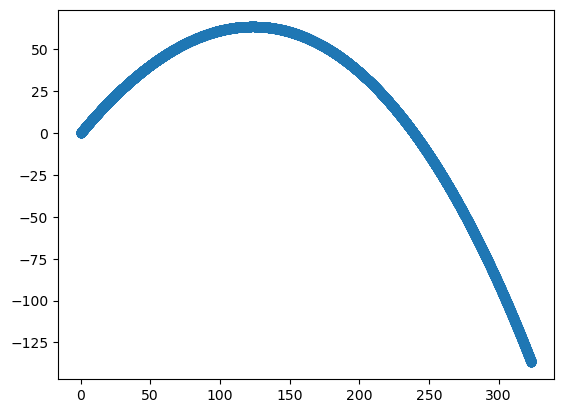

In [414]:
plt.scatter(x, y)

In [415]:
def objective_function(params, target, t_span):
    v, phi = params
    
    target_x, target_y = target
    x = 0
    y = 0
    vx = v * np.cos(np.radians(phi))
    vy = v * np.sin(np.radians(phi))
    initial_conditions = [x, y, vx, vy]
    
    time = np.linspace(t_span[0], t_span[1], 1000)
    
    solution = solve_ivp(proj_motion, t_span, initial_conditions, t_eval=time, method='RK45', dense_output=True)
    
    distance_residual = np.sqrt((solution.y[0][-1] - target_x) ** 2 + (solution.y[1][-1] - target_y) ** 2)
    
    return distance_residual

In [416]:
# Initial guess for initial velocity and launch angle
initial_guess = [10, 10]

# Target coordinates to hit
target_coordinates = [10, 55]

# Time spans for the projectile motion
t_span = (0, 5)

In [417]:
# Use minimize with Nelder-Mead to find the optimal initial velocity and launch angle for t_span
result = minimize(objective_function, x0=initial_guess, args=(target_coordinates, t_span), method='Nelder-Mead')

# Get the optimal initial velocity and launch angle for t_span
optimal_velocity1 = result.x[0]
optimal_launch_angle1 = result.x[1]

In [418]:
print('The Optimal Velocity:', optimal_velocity1, 'm/s')
print('The Optimal Launch Angle:', optimal_launch_angle1, 'degrees')

The Optimal Velocity: 35.697008095653274 m/s
The Optimal Launch Angle: 84.37327154950985 degrees


In [419]:
# Simulate projectile motion with the optimal initial velocity and launch angle for t_span
optimal_conditions1 = [optimal_velocity1, optimal_launch_angle1]
optimal_solution1 = solve_ivp(proj_motion, t_span, [0, 0, optimal_velocity1 * np.cos(np.radians(optimal_launch_angle1)), optimal_velocity1 * np.sin(np.radians(optimal_launch_angle1))], method='RK45', dense_output=True)

In [420]:
# Time values for plotting
time_values1 = np.linspace(t_span[0], t_span[1], 1000)

In [421]:
# Evaluate the solutions at the time values
y_values1 = optimal_solution1.sol(time_values1)

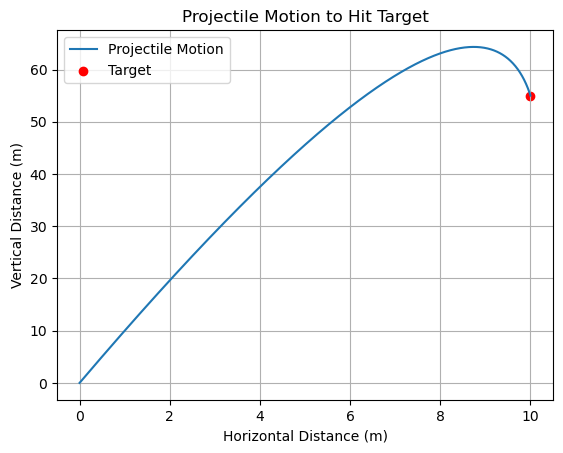

In [422]:
# Plot the trajectories
plt.plot(y_values1[0], y_values1[1], label='Projectile Motion')
plt.scatter(target_coordinates[0], target_coordinates[1], color='red', label='Target')
plt.title('Projectile Motion to Hit Target')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.legend()
plt.grid(True)
plt.show()

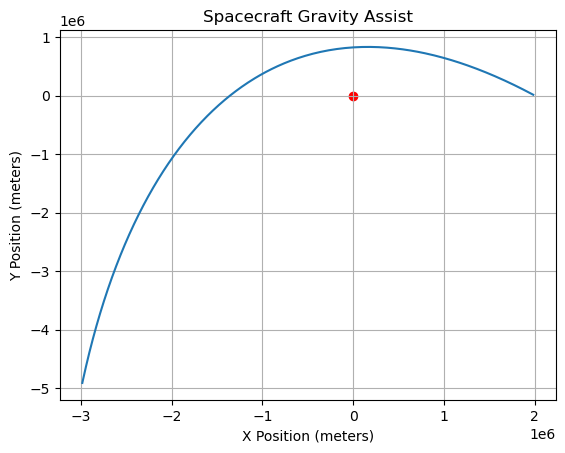

In [240]:
import numpy as np
import matplotlib.pyplot as plt

def gravitational_force(mass1, mass2, distance):
    G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
    force = G * (mass1) / (distance ** 2)
    return force

def simulate_gravity_assist(velocity_initial, slingshot_angle, num_steps):
    # Constants
    mass_earth = 5.972e24  # Earth mass in kg
    radius_earth = 6.371e6  # Earth radius in meters
    velocity_earth = 30e3  # Earth orbital velocity in m/s

    # Initial conditions
    position = np.array([2e6, 0.0])  # Starting position at Earth's surface

    # Calculate initial velocity components based on slingshot angle
    angle_rad = np.radians(slingshot_angle)
    velocity_x = velocity_initial * np.cos(angle_rad)
    velocity_y = velocity_initial * np.sin(angle_rad)
    velocity = np.array([velocity_x, velocity_y])  # Initial velocity vector

    # Time parameters
    delta_t = 1.0  # Time step in seconds

    # Arrays for storing trajectory data
    positions_x = []
    positions_y = []

    for _ in range(num_steps):
        # Calculate gravitational force
        distance = np.linalg.norm(position)
        force_magnitude = gravitational_force(mass_earth, mass_spacecraft, distance)
        force_direction = -position / distance
        force = force_magnitude * force_direction

        # Update velocity and position using the Verlet integration method
        velocity += (force / mass_spacecraft) * delta_t
        position += velocity * delta_t + 0.5 * (force / mass_spacecraft) * (delta_t ** 2)

        # Store trajectory data
        positions_x.append(position[0])
        positions_y.append(position[1])

    # Plot the trajectory
    plt.plot(positions_x, positions_y, label='Trajectory')
    plt.scatter([0], [0], color='red', label='Earth')
    plt.grid()
    plt.title('Spacecraft Gravity Assist')
    plt.xlabel('X Position (meters)')
    plt.ylabel('Y Position (meters)')
    #plt.legend()
    plt.show()

# Example usage
velocity_initial = 2e4 # Initial velocity of the spacecraft in m/s
slingshot_angle = 500  # Angle of the slingshot maneuver in degrees
num_steps = 500  # Number of simulation steps

simulate_gravity_assist(velocity_initial, slingshot_angle, num_steps)

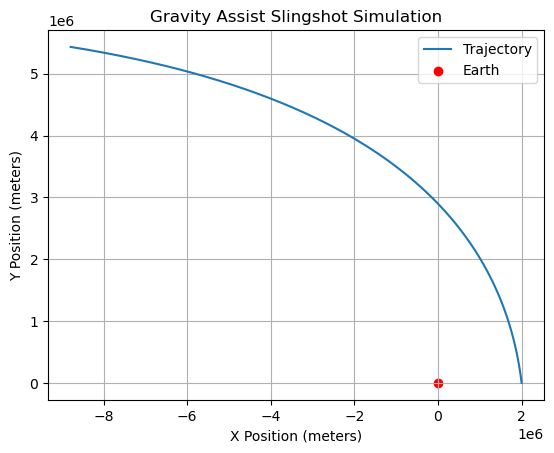

In [494]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def gravitational_force(t, state, mass_spacecraft):
    G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
    position, velocity = np.split(state, 2)
    distance = np.linalg.norm(position)
    distance_moon = np.linalg.norm(384e6 - position)
    force_magnitude = G * (mass_earth) / (distance ** 2)
    force_magnitude_moon = G * (mass_moon) / (distance_moon ** 2)
    force_direction = -position / distance
    force = (force_magnitude + force_magnitude_moon) * force_direction
    return np.concatenate([velocity, force / mass_spacecraft])

def simulate_gravity_assist(mass_spacecraft, velocity_initial, slingshot_angle, num_steps):
    # Constants
    global mass_earth
    mass_earth = 5.972e24  # Earth mass in kg
    radius_earth = 6.371e6  # Earth radius in meters

    # Initial conditions
    position_initial = np.array([2e6, 0.0])  # Starting position at Earth's surface
    angle_rad = np.radians(slingshot_angle)
    velocity_initial = np.array([velocity_initial * np.cos(angle_rad), velocity_initial * np.sin(angle_rad)])

    # Combine initial position and velocity into a single array
    state_initial = np.concatenate([position_initial, velocity_initial])

    # Time parameters
    t_span = (0, num_steps)
    t_eval = np.linspace(t_span[0], t_span[1], num_steps)

    # Solve the ODE system using solve_ivp
    solution = solve_ivp(gravitational_force, t_span, state_initial, args=(mass_spacecraft,), t_eval=t_eval, method='RK45')

    # Extract position from the solution
    positions = solution.y[:2]

    # Plot the trajectory
    plt.plot(positions[0], positions[1], label='Trajectory')
    plt.scatter([0], [0], color='red', label='Earth')
    plt.title('Gravity Assist Slingshot Simulation')
    plt.xlabel('X Position (meters)')
    plt.ylabel('Y Position (meters)')
    plt.grid()
    plt.legend()
    plt.show()

# Example usage
mass_spacecraft = 1  # Mass of the spacecraft in kg
velocity_initial = 2e4  # Initial velocity of the spacecraft in m/s
slingshot_angle = 100  # Angle of the slingshot maneuver in degrees
num_steps = 1000  # Number of simulation steps

simulate_gravity_assist(mass_spacecraft, velocity_initial, slingshot_angle, num_steps)

### Using the Moon as a Slingshot

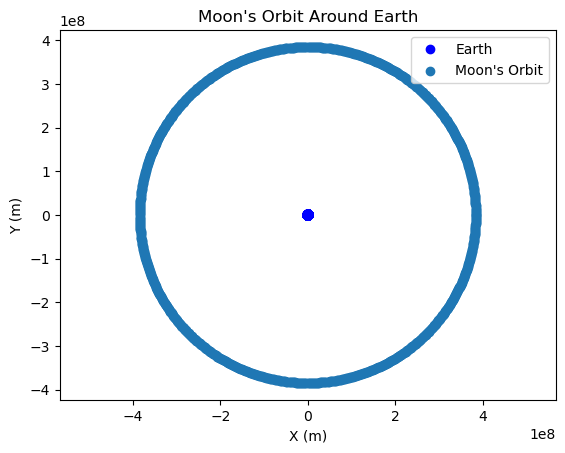

In [243]:
# Constants
earth_radius = 6371e3  # in kilometers
moon_orbit_radius = 384400e3  # average distance from Earth to Moon in kilometers
earth_scale_factor = 0.2  # adjust this scale factor as needed for visualization

# Create an array of angles for one complete orbit (0 to 2*pi)
theta = np.linspace(0, 2*np.pi, 1000)

# Parametric equations for a circle (moon's orbit)
moon_orbit_x = moon_orbit_radius * np.cos(theta)
moon_orbit_y = moon_orbit_radius * np.sin(theta)

# Parametric equations for a circle (scaled Earth)
earth_x = earth_scale_factor * earth_radius * np.cos(theta)
earth_y = earth_scale_factor * earth_radius * np.sin(theta)

# Plotting the scaled Earth at the center
plt.plot(earth_x, earth_y, 'bo', label='Earth')

# Plotting the moon's orbit
plt.scatter(moon_orbit_x, moon_orbit_y, label="Moon's Orbit")

# Set equal scaling to ensure a circle looks like a circle
plt.axis('equal')

# Set labels and title
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title("Moon's Orbit Around Earth")

# Display legend
plt.legend()

# Display the plot
plt.show()


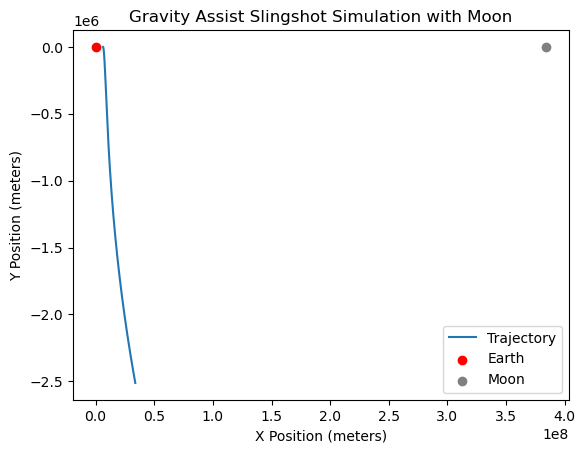

In [339]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def gravitational_force(t, state, mass_spacecraft, mass_orbiting):
    G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
    
    # Split state into position and velocity
    position = state[:2]
    velocity = state[2:]
    
    # Gravitational force from Earth
    distance_earth = np.linalg.norm(position)
    force_earth_magnitude = G * (mass_earth * mass_spacecraft) / (distance_earth ** 2)
    force_earth_direction = -position / distance_earth
    force_earth = force_earth_magnitude * force_earth_direction
    
    # Gravitational force from the Moon
    distance_moon = np.linalg.norm(position - position_moon)
    force_moon_magnitude = G * (mass_moon * mass_spacecraft) / (distance_moon ** 2)
    force_moon_direction = (position_moon - position) / distance_moon
    force_moon = force_moon_magnitude * force_moon_direction
    
    total_force = force_earth + force_moon
    
    # Combine velocity and force components into a single array
    return np.concatenate([velocity, total_force / mass_spacecraft])

def simulate_gravity_assist(mass_spacecraft, velocity_initial, slingshot_angle, num_steps, mass_orbiting):
    # Constants
    global mass_earth, mass_moon, position_moon
    mass_earth = 5.972e24  # Earth mass in kg
    mass_moon = 7.342e22   # Moon mass in kg
    radius_earth = 6.371e6  # Earth radius in meters
    
    # Moon's position relative to Earth
    position_moon = np.array([384.4e6, 0.0])  # Average distance from Earth to Moon in meters
    
    # Initial conditions for the spacecraft
    position_initial = np.array([radius_earth, 0.0])  # Starting position at Earth's surface
    
    # Adjust the angle to point the spacecraft towards the Moon for the slingshot
    slingshot_angle_rad = np.radians(slingshot_angle)
    
    # Initial velocity includes both Earth's orbital velocity and the desired slingshot velocity
    velocity_earth = np.sqrt(G * mass_earth / radius_earth)
    velocity_moon_slingshot = np.sqrt(G * mass_moon / np.linalg.norm(position_moon))
    
    # Modified initial velocity components (including both upward and horizontal components)
    velocity_initial = np.array([
        velocity_earth * np.cos(slingshot_angle_rad) + velocity_moon_slingshot * np.cos(slingshot_angle_rad),
        velocity_earth * np.sin(slingshot_angle_rad) + velocity_moon_slingshot * np.sin(slingshot_angle_rad),
        0.0  # Assuming no initial velocity in the z-direction (out of the orbital plane)
    ])
    
    # Combine initial position and velocity into a single array
    state_initial = np.concatenate([position_initial, velocity_initial])
    
    # Other simulation parameters and time span
    t_span = (0, num_steps)
    t_eval = np.linspace(t_span[0], t_span[1], num_steps)
    
    # Solve the ODE system using solve_ivp
    solution = solve_ivp(gravitational_force, t_span, state_initial, args=(mass_spacecraft, mass_orbiting),
                        t_eval=t_eval, method='RK45')
    
    # Extract position from the solution
    positions = solution.y[:2]
    
    # Plot the trajectory
    plt.plot(positions[0], positions[1], label='Trajectory')
    plt.scatter([0], [0], color='red', label='Earth')
    plt.scatter([position_moon[0]], [position_moon[1]], color='gray', label='Moon')
    plt.title('Gravity Assist Slingshot Simulation with Moon')
    plt.xlabel('X Position (meters)')
    plt.ylabel('Y Position (meters)')
    plt.legend()
    plt.show()

# Example usage with the Moon as an additional mass (mass_orbiting)
mass_orbiting = 1e20  # Mass of the additional mass in kg (you can adjust this value)
mass_spacecraft = 1  # Mass of the spacecraft in kg
velocity_initial = 3e2  # Initial velocity of the spacecraft in m/s
slingshot_angle = 0  # Angle of the slingshot maneuver in degrees
num_steps = 1000  # Number of simulation steps

simulate_gravity_assist(mass_spacecraft, velocity_initial, slingshot_angle, num_steps, mass_orbiting)

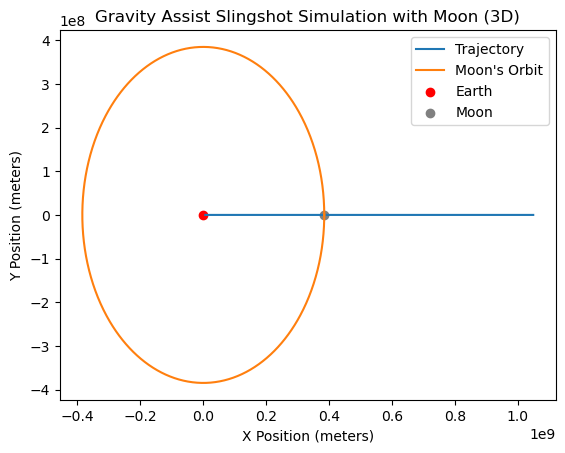

In [338]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def gravitational_force(t, state, mass_spacecraft, mass_orbiting):
    G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
    
    # Split state into position and velocity
    position = state[:3]
    velocity = state[3:]
    
    # Gravitational force from Earth
    distance_earth = np.linalg.norm(position)
    force_earth_magnitude = G * (mass_earth * mass_spacecraft) / (distance_earth ** 2)
    force_earth_direction = -position / distance_earth
    force_earth = force_earth_magnitude * force_earth_direction
    
    # Gravitational force from the Moon
    distance_moon = np.linalg.norm(position - position_moon)
    force_moon_magnitude = G * (mass_moon * mass_spacecraft) / (distance_moon ** 2)
    force_moon_direction = (position_moon - position) / distance_moon
    force_moon = force_moon_magnitude * force_moon_direction
    
    total_force = force_earth + force_moon
    
    # Combine velocity and force components into a single array
    return np.concatenate([velocity, total_force / mass_spacecraft])

def simulate_gravity_assist(mass_spacecraft, velocity_magnitude, slingshot_angle, num_steps, mass_orbiting):
    # Constants
    global mass_earth, mass_moon, position_moon
    mass_earth = 5.972e24  # Earth mass in kg
    mass_moon = 7.342e22   # Moon mass in kg
    radius_earth = 6.371e6  # Earth radius in meters
    
    # Moon's position relative to Earth
    position_moon = np.array([384.4e6, 0.0, 0.0])  # Average distance from Earth to Moon in meters
    
    # Initial conditions for the spacecraft
    position_initial = np.array([radius_earth, 0.0, 0.0])  # Starting position at Earth's surface
    
    # Adjust the angle to point the spacecraft towards the Moon for the slingshot
    slingshot_angle_rad = np.radians(slingshot_angle)
    
    # Initial velocity components for launching towards the Moon
    velocity_horizontal = velocity_magnitude * np.cos(slingshot_angle_rad)
    velocity_vertical = velocity_magnitude * np.sin(slingshot_angle_rad)
    
    velocity_initial = np.array([velocity_horizontal, velocity_vertical, 0.0])
    
    # Combine initial position and velocity into a single array
    state_initial = np.concatenate([position_initial, velocity_initial])
    
    # Other simulation parameters and time span
    t_span = (0, num_steps)
    t_eval = np.linspace(t_span[0], t_span[1], num_steps)
    
    # Solve the ODE system using solve_ivp
    solution = solve_ivp(gravitational_force, t_span, state_initial, args=(mass_spacecraft, mass_orbiting),
                        t_eval=t_eval, method='RK45')
    
    # Extract position from the solution
    positions = solution.y[:3]
    
    # Plot the trajectory
    plt.plot(positions[0], positions[1], label='Trajectory')
    plt.scatter([0], [0], color='red', label='Earth')
    plt.scatter([position_moon[0]], [position_moon[1]], color='gray', label='Moon')
    plt.plot(moon_orbit_x, moon_orbit_y, label="Moon's Orbit")
    plt.title('Gravity Assist Slingshot Simulation with Moon (3D)')
    plt.xlabel('X Position (meters)')
    plt.ylabel('Y Position (meters)')
    plt.legend()
    plt.show()

# Example usage with the Moon as an additional mass (mass_orbiting)
mass_orbiting = 1e20  # Mass of the additional mass in kg (you can adjust this value)
mass_spacecraft = 1  # Mass of the spacecraft in kg
velocity_magnitude = 7e4  # Adjust this value based on your requirements
slingshot_angle = 0  # Adjust the slingshot angle
num_steps = 15000  # Increase the number of simulation steps for accuracy

simulate_gravity_assist(mass_spacecraft, velocity_magnitude, slingshot_angle, num_steps, mass_orbiting)


### Incorporating Drag to the Shooting Problem

The Optimal Velocity: 2460.285235376154 m/s
The Optimal Launch Angle: 84.96673231223214 degrees


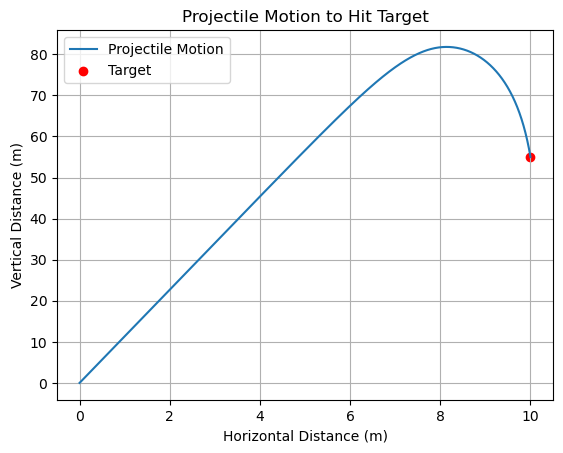

In [436]:
def proj_motion(t, eqn):
    x, y, vx, vy = eqn
    g = 9.81 # m/s/s
    drag_coefficient = 10
    rho_air = 1.292
    area = 0.01
    v = np.sqrt(vx**2 + vy**2)
    drag_force_x = -0.5 * rho_air * area * drag_coefficient * v * vx
    drag_force_y = -0.5 * rho_air * area * drag_coefficient * v * vy
    ax = drag_force_x
    ay = -g + drag_force_y
    return [vx, vy, ax, ay]

def objective_function(params, target, t_span):
    v, phi = params
    
    target_x, target_y = target
    x = 0
    y = 0
    vx = v * np.cos(np.radians(phi))
    vy = v * np.sin(np.radians(phi))
    initial_conditions = [x, y, vx, vy]
    
    time = np.linspace(t_span[0], t_span[1], 1000)
    
    solution = solve_ivp(proj_motion, t_span, initial_conditions, t_eval=time, method='RK45', dense_output=True)
    
    distance_residual = np.sqrt((solution.y[0][-1] - target_x) ** 2 + (solution.y[1][-1] - target_y) ** 2)
    
    return distance_residual
# Initial guess for initial velocity and launch angle
initial_guess = [10, 10]

# Target coordinates to hit
target_coordinates = [10, 55]

# Time spans for the projectile motion
t_span = (0, 5)
# Use minimize with Nelder-Mead to find the optimal initial velocity and launch angle for t_span
result = minimize(objective_function, x0=initial_guess, args=(target_coordinates, t_span), method='Nelder-Mead')

# Get the optimal initial velocity and launch angle for t_span
optimal_velocity1 = result.x[0]
optimal_launch_angle1 = result.x[1]
print('The Optimal Velocity:', optimal_velocity1, 'm/s')
print('The Optimal Launch Angle:', optimal_launch_angle1, 'degrees')
# Simulate projectile motion with the optimal initial velocity and launch angle for t_span
optimal_conditions1 = [optimal_velocity1, optimal_launch_angle1]
optimal_solution1 = solve_ivp(proj_motion, t_span, [0, 0, optimal_velocity1 * np.cos(np.radians(optimal_launch_angle1)), optimal_velocity1 * np.sin(np.radians(optimal_launch_angle1))], method='RK45', dense_output=True)
# Time values for plotting
time_values1 = np.linspace(t_span[0], t_span[1], 1000)
# Evaluate the solutions at the time values
y_values1 = optimal_solution1.sol(time_values1)
# Plot the trajectories
plt.plot(y_values1[0], y_values1[1], label='Projectile Motion')
plt.scatter(target_coordinates[0], target_coordinates[1], color='red', label='Target')
plt.title('Projectile Motion to Hit Target')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.legend()
plt.grid(True)
plt.show()

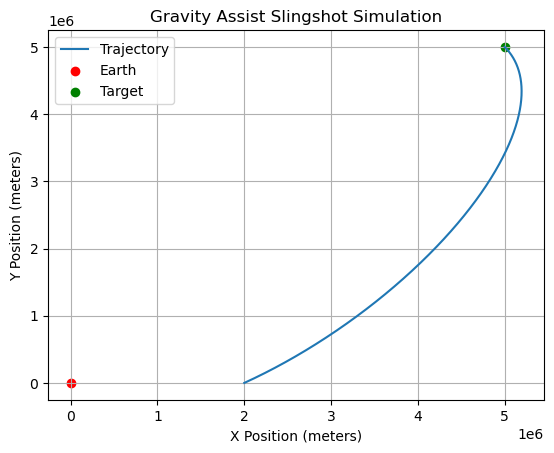

Optimal Initial Velocity: 17084.20919741891 m/s
Optimal Slingshot Angle: 30.510070771345372 degrees


In [506]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

def gravitational_force(t, state, mass_earth, radius_earth, mass_moon):
    G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
    position, velocity = np.split(state, 2)
    distance = np.linalg.norm(position)
    distance_moon = np.linalg.norm([384e6 - position[0], -position[1]])  # Adjust for moon's position
    force_magnitude = G * mass_earth / (distance ** 2)
    force_magnitude_moon = G * mass_moon / (distance_moon ** 2)
    force_direction = -position / distance
    force = (force_magnitude + force_magnitude_moon) * force_direction
    return np.concatenate([velocity, force])

def simulate_gravity_assist(params, num_steps):
    # Extract parameters
    velocity_initial, slingshot_angle = params

    # Constants
    mass_earth = 5.972e24  # Earth mass in kg
    radius_earth = 6.371e6  # Earth radius in meters
    mass_moon = 7.342e22  # Moon mass in kg

    # Initial conditions
    position_initial = np.array([2e6, 0.0])  # Starting position at Earth's surface
    angle_rad = np.radians(slingshot_angle)
    velocity_initial = np.array([velocity_initial * np.cos(angle_rad), velocity_initial * np.sin(angle_rad)])

    # Combine initial position and velocity into a single array
    state_initial = np.concatenate([position_initial, velocity_initial])

    # Time parameters
    t_span = (0, num_steps)
    t_eval = np.linspace(t_span[0], t_span[1], num_steps)

    # Solve the ODE system using solve_ivp
    solution = solve_ivp(gravitational_force, t_span, state_initial, args=(mass_earth, radius_earth, mass_moon), t_eval=t_eval, method='RK45')

    # Extract position from the solution
    positions = solution.y[:2]

    return positions

# Target coordinates
target_coordinates = [5e6, 5e6]

# Optimization objective function
objective_function = lambda params: np.linalg.norm(simulate_gravity_assist(params, num_steps=1000)[:, -1] - target_coordinates)

# Initial guess for parameters
initial_guess = [2e4, 100]  # [velocity_initial, slingshot_angle]

# Use minimize to find the optimal parameters
result = minimize(objective_function, x0=initial_guess, method='L-BFGS-B')

# Get the optimal parameters
optimal_params = result.x
optimal_velocity_initial, optimal_slingshot_angle = optimal_params

# Simulate gravity assist with the optimal parameters and plot the final trajectory
final_positions = simulate_gravity_assist(optimal_params, num_steps=1000)

# Plot the final trajectory with the Earth and the target
plt.plot(final_positions[0], final_positions[1], label='Trajectory')
plt.scatter([0], [0], color='red', label='Earth')
plt.scatter(target_coordinates[0], target_coordinates[1], color='green', label='Target')
plt.title('Gravity Assist Slingshot Simulation')
plt.xlabel('X Position (meters)')
plt.ylabel('Y Position (meters)')
plt.grid()
plt.legend()
plt.show()

# Print the optimal parameters
print('Optimal Initial Velocity:', optimal_velocity_initial, 'm/s')
print('Optimal Slingshot Angle:', optimal_slingshot_angle, 'degrees')
